# Predicting the Price of Houses using Machine Learning

This notebook predicts the price of houses using historical data using regression.  The data and objectives are from a past Kaggle competition, see https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

The purpose of the model built in this notebook is to be used in an API.  The 10 most important feature variables will be used from a model built previously, see https://github.com/tylersanderson/house-prices-regression

## 1. Problem definition

> Predict the future sale price of a house, given its characteristics and previous examples of the price of similar houses that have been sold.

## 2. Data

The data is downloaded from the Kaggle House Prices competition: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

There are 2 main datasets:

* Train.csv is the training set.
* Test. csv is the test set.

## 3. Evaluation

The evaluation metric for this competition is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

For more on the evaulation of this project check:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation


## 4. Features

Kaggle provides a data dictionay detailing all of the features of the dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [194]:
# Import training set
train = pd.read_csv("data/train.csv", 
                low_memory=False)

In [195]:
# Import test set
test = pd.read_csv("data/test.csv", 
                low_memory=False)

In [196]:
df = pd.concat([train.assign(source="train"), test.assign(source="test")])

In [197]:
# Remove all features except for top 10 most important features
df = df[['source', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'LotArea', 'GarageArea', 'YearBuilt', 'GarageCars', 'SalePrice']]

In [198]:
df.isna().sum()

source            0
OverallQual       0
GrLivArea         0
TotalBsmtSF       1
2ndFlrSF          0
BsmtFinSF1        1
1stFlrSF          0
LotArea           0
GarageArea        1
YearBuilt         0
GarageCars        1
SalePrice      1459
dtype: int64

<AxesSubplot:ylabel='Frequency'>

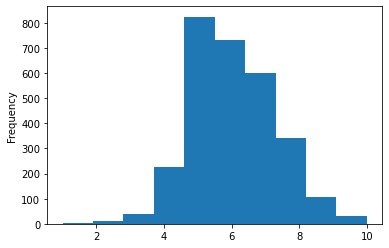

In [199]:
df.OverallQual.plot.hist()

In [200]:
df.head()

,source,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars,SalePrice
0,train,7,1710,856.0,854,706.0,856,8450,548.0,2003,2.0,208500.0
1,train,6,1262,1262.0,0,978.0,1262,9600,460.0,1976,2.0,181500.0
2,train,7,1786,920.0,866,486.0,920,11250,608.0,2001,2.0,223500.0
3,train,7,1717,756.0,756,216.0,961,9550,642.0,1915,3.0,140000.0
4,train,8,2198,1145.0,1053,655.0,1145,14260,836.0,2000,3.0,250000.0


In [201]:
df.head().T

,0,1,2,3,4
source,train,train,train,train,train
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
TotalBsmtSF,856,1262,920,756,1145
2ndFlrSF,854,0,866,756,1053
BsmtFinSF1,706,978,486,216,655
1stFlrSF,856,1262,920,961,1145
LotArea,8450,9600,11250,9550,14260
GarageArea,548,460,608,642,836
YearBuilt,2003,1976,2001,1915,2000


In [202]:
df.describe()

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars,SalePrice
count,2919.000000,2919.000000,2918.000000,2919.000000,2918.000000,2919.000000,2919.000000,2918.000000,2919.000000,2918.000000,1460.000000
mean,6.089072,1500.759849,1051.777587,336.483727,441.423235,1159.581706,10168.114080,472.874572,1971.312778,1.766621,180921.195890
std,1.409947,506.051045,440.766258,428.701456,455.610826,392.362079,7886.996359,215.394815,30.291442,0.761624,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,1300.000000,0.000000,1872.000000,0.000000,34900.000000
25%,5.000000,1126.000000,793.000000,0.000000,0.000000,876.000000,7478.000000,320.000000,1953.500000,1.000000,129975.000000
50%,6.000000,1444.000000,989.500000,0.000000,368.500000,1082.000000,9453.000000,480.000000,1973.000000,2.000000,163000.000000
75%,7.000000,1743.500000,1302.000000,704.000000,733.000000,1387.500000,11570.000000,576.000000,2001.000000,2.000000,214000.000000
max,10.000000,5642.000000,6110.000000,2065.000000,5644.000000,5095.000000,215245.000000,1488.000000,2010.000000,5.000000,755000.000000


### Make a copy of the original DataFrame

In [203]:
# Make a copy
df_tmp = df.copy()

In [204]:
df_tmp.head().T

,0,1,2,3,4
source,train,train,train,train,train
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
TotalBsmtSF,856,1262,920,756,1145
2ndFlrSF,854,0,866,756,1053
BsmtFinSF1,706,978,486,216,655
1stFlrSF,856,1262,920,961,1145
LotArea,8450,9600,11250,9550,14260
GarageArea,548,460,608,642,836
YearBuilt,2003,1976,2001,1915,2000


## 5. Modelling

In [205]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   source       2919 non-null   object 
 1   OverallQual  2919 non-null   int64  
 2   GrLivArea    2919 non-null   int64  
 3   TotalBsmtSF  2918 non-null   float64
 4   2ndFlrSF     2919 non-null   int64  
 5   BsmtFinSF1   2918 non-null   float64
 6   1stFlrSF     2919 non-null   int64  
 7   LotArea      2919 non-null   int64  
 8   GarageArea   2918 non-null   float64
 9   YearBuilt    2919 non-null   int64  
 10  GarageCars   2918 non-null   float64
 11  SalePrice    1460 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 296.5+ KB


In [206]:
df_tmp.isna().sum()

source            0
OverallQual       0
GrLivArea         0
TotalBsmtSF       1
2ndFlrSF          0
BsmtFinSF1        1
1stFlrSF          0
LotArea           0
GarageArea        1
YearBuilt         0
GarageCars        1
SalePrice      1459
dtype: int64

### Convert strings to categories

Turn all of our data into numbers by converting them into pandas categories.

In [207]:
df_tmp.head().T

,0,1,2,3,4
source,train,train,train,train,train
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
TotalBsmtSF,856,1262,920,756,1145
2ndFlrSF,854,0,866,756,1053
BsmtFinSF1,706,978,486,216,655
1stFlrSF,856,1262,920,961,1145
LotArea,8450,9600,11250,9550,14260
GarageArea,548,460,608,642,836
YearBuilt,2003,1976,2001,1915,2000


In [208]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

source


In [209]:
# Turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [210]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   source       2919 non-null   category
 1   OverallQual  2919 non-null   int64   
 2   GrLivArea    2919 non-null   int64   
 3   TotalBsmtSF  2918 non-null   float64 
 4   2ndFlrSF     2919 non-null   int64   
 5   BsmtFinSF1   2918 non-null   float64 
 6   1stFlrSF     2919 non-null   int64   
 7   LotArea      2919 non-null   int64   
 8   GarageArea   2918 non-null   float64 
 9   YearBuilt    2919 non-null   int64   
 10  GarageCars   2918 non-null   float64 
 11  SalePrice    1460 non-null   float64 
dtypes: category(1), float64(5), int64(6)
memory usage: 276.6 KB


All data is now in the form of numbers.

In [211]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

source         0.000000
OverallQual    0.000000
GrLivArea      0.000000
TotalBsmtSF    0.000343
2ndFlrSF       0.000000
BsmtFinSF1     0.000343
1stFlrSF       0.000000
LotArea        0.000000
GarageArea     0.000343
YearBuilt      0.000000
GarageCars     0.000343
SalePrice      0.499829
dtype: float64

### Save preprocessed data

In [212]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_test_tmp.csv",
             index=False)

In [213]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_test_tmp.csv",
             low_memory=False)
df_tmp.head().T

,0,1,2,3,4
source,train,train,train,train,train
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
TotalBsmtSF,856,1262,920,756,1145
2ndFlrSF,854,0,866,756,1053
BsmtFinSF1,706,978,486,216,655
1stFlrSF,856,1262,920,961,1145
LotArea,8450,9600,11250,9550,14260
GarageArea,548,460,608,642,836
YearBuilt,2003,1976,2001,1915,2000


In [214]:
pd.set_option('display.max_rows', 100)
df_tmp.isna().sum()

source            0
OverallQual       0
GrLivArea         0
TotalBsmtSF       1
2ndFlrSF          0
BsmtFinSF1        1
1stFlrSF          0
LotArea           0
GarageArea        1
YearBuilt         0
GarageCars        1
SalePrice      1459
dtype: int64

## Fill missing values

### Fill numerical missing values first

In [215]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

OverallQual
GrLivArea
TotalBsmtSF
2ndFlrSF
BsmtFinSF1
1stFlrSF
LotArea
GarageArea
YearBuilt
GarageCars
SalePrice


In [216]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

TotalBsmtSF
BsmtFinSF1
GarageArea
GarageCars
SalePrice


In [217]:
# Fill numeric rows with zero
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with 0
            df_tmp[label] = content.fillna(0)

In [218]:
len(df_tmp)

2919

In [219]:
df_tmp.head().T

,0,1,2,3,4
source,train,train,train,train,train
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
TotalBsmtSF,856,1262,920,756,1145
2ndFlrSF,854,0,866,756,1053
BsmtFinSF1,706,978,486,216,655
1stFlrSF,856,1262,920,961,1145
LotArea,8450,9600,11250,9550,14260
GarageArea,548,460,608,642,836
YearBuilt,2003,1976,2001,1915,2000


In [220]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [221]:
pd.set_option('display.max_rows', 100)
df_tmp.isna().sum()

source         0
OverallQual    0
GrLivArea      0
TotalBsmtSF    0
2ndFlrSF       0
BsmtFinSF1     0
1stFlrSF       0
LotArea        0
GarageArea     0
YearBuilt      0
GarageCars     0
SalePrice      0
dtype: int64

### Filling and turning categorical variables into numbers

In [222]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

source


In [223]:
# Turn categorical variables in to numbers and fill missing
#for label, content in df_tmp.items():
#    if not pd.api.types.is_numeric_dtype(content):
#        # Add binary column to indicate whether sample had missing value
#        df_tmp[label+"_is_missing"] = pd.isnull(content)
#        # Turn categories into numbers and add +1
#        df_tmp[label] = pd.Categorical(content).codes+1

In [224]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   source       2919 non-null   object 
 1   OverallQual  2919 non-null   int64  
 2   GrLivArea    2919 non-null   int64  
 3   TotalBsmtSF  2919 non-null   float64
 4   2ndFlrSF     2919 non-null   int64  
 5   BsmtFinSF1   2919 non-null   float64
 6   1stFlrSF     2919 non-null   int64  
 7   LotArea      2919 non-null   int64  
 8   GarageArea   2919 non-null   float64
 9   YearBuilt    2919 non-null   int64  
 10  GarageCars   2919 non-null   float64
 11  SalePrice    2919 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 273.8+ KB


In [225]:
df_tmp.head().T

,0,1,2,3,4
source,train,train,train,train,train
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
TotalBsmtSF,856,1262,920,756,1145
2ndFlrSF,854,0,866,756,1053
BsmtFinSF1,706,978,486,216,655
1stFlrSF,856,1262,920,961,1145
LotArea,8450,9600,11250,9550,14260
GarageArea,548,460,608,642,836
YearBuilt,2003,1976,2001,1915,2000


In [226]:
pd.set_option('display.max_rows', 150)
df_tmp.isna().sum()

source         0
OverallQual    0
GrLivArea      0
TotalBsmtSF    0
2ndFlrSF       0
BsmtFinSF1     0
1stFlrSF       0
LotArea        0
GarageArea     0
YearBuilt      0
GarageCars     0
SalePrice      0
dtype: int64

All of the data is numeric as well and dataframe has no missing values, machine learning model can be built

In [240]:
df_tmp.head()

,source,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars,SalePrice
0,train,7,1710,856.0,854,706.0,856,8450,548.0,2003,2.0,208500.0
1,train,6,1262,1262.0,0,978.0,1262,9600,460.0,1976,2.0,181500.0
2,train,7,1786,920.0,866,486.0,920,11250,608.0,2001,2.0,223500.0
3,train,7,1717,756.0,756,216.0,961,9550,642.0,1915,3.0,140000.0
4,train,8,2198,1145.0,1053,655.0,1145,14260,836.0,2000,3.0,250000.0


In [242]:
df_tmp.source

0       train
1       train
2       train
3       train
4       train
        ...  
2914     test
2915     test
2916     test
2917     test
2918     test
Name: source, Length: 2919, dtype: object

In [243]:
df_train, df_test = df_tmp[df_tmp["source"].eq('train')], df_tmp[df_tmp["source"].eq('test')]

In [244]:
# Drop source from df_train and df_test
df_train = df_train.drop(["source"], axis=1)
df_test = df_test.drop(["source"], axis=1)

In [245]:
# Split data into X and y
X = df_train.drop("SalePrice", axis=1)

y = df_train["SalePrice"]

In [246]:
X

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars
0,7,1710,856.0,854,706.0,856,8450,548.0,2003,2.0
1,6,1262,1262.0,0,978.0,1262,9600,460.0,1976,2.0
2,7,1786,920.0,866,486.0,920,11250,608.0,2001,2.0
3,7,1717,756.0,756,216.0,961,9550,642.0,1915,3.0
4,8,2198,1145.0,1053,655.0,1145,14260,836.0,2000,3.0
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953.0,694,0.0,953,7917,460.0,1999,2.0
1456,6,2073,1542.0,0,790.0,2073,13175,500.0,1978,2.0
1457,7,2340,1152.0,1152,275.0,1188,9042,252.0,1941,1.0
1458,5,1078,1078.0,0,49.0,1078,9717,240.0,1950,1.0


In [247]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [248]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

### Building an evaluation function

In [249]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

## Testing our model (to tune the hyperparameters)

In [250]:
len(X_train)

1168

In [251]:
len(y_train)

1168

In [252]:
from sklearn.ensemble import RandomForestRegressor
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=None)

In [253]:
%%time
model.fit(X_train, y_train)

Wall time: 427 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [254]:
show_scores(model)

{'Training MAE': 7024.506229044357,
 'Valid MAE': 18598.93595890411,
 'Training RMSLE': 0.06322860126295274,
 'Valid RMSLE': 0.16303126205237153,
 'Training R^2': 0.978066009310461,
 'Valid R^2': 0.891449083128597}

In [255]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning with RandomizedSearchCV

In [110]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Different RandomForestRegressor hyperparameters
rf_grid = {"bootstrap": [False, True],
           "n_estimators": np.arange(10, 100, 10),
           "max_depth": [None],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": ["auto"],
           "max_samples": [None]}

# Your custom scoring strategy
def my_custom_score(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Wrapping it in make_scorer to able to use in RandomizedSearch
my_scorer = make_scorer(my_custom_score)

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=10000,
                             cv=5,
                             verbose=True,
                             scoring=my_scorer)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

C:\Users\tyler\Documents\Machine-Learning\house-prices-regression\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1620 is smaller than n_iter=10000. Running 1620 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Wall time: 23min 58s


[Parallel(n_jobs=1)]: Done 8100 out of 8100 | elapsed: 24.0min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=10000,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   scoring=make_scorer(my_custom_score), verbose=True)

In [111]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [112]:
# Evaluate the RanomizedSearch model
show_scores(rs_model)

{'Training MAE': 2756.150684931507,
 'Valid MAE': 27167.222602739723,
 'Training RMSLE': 0.030960333817804445,
 'Valid RMSLE': 0.21943084687353387,
 'Training R^2': 0.9943789440262245,
 'Valid R^2': 0.787476847749115}

### Train a model with the best hyperparameters

**Note:** `RandomizedSearchCV` did not improve the model, using original hyperparameters

In [276]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(bootstrap=True,
                                    n_estimators=100,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features='auto',
                                    max_depth=None,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 607 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [184]:
# Scores for ideal_model
show_scores(ideal_model)

{'Training MAE': 7047.274336105675,
 'Valid MAE': 18580.52598173516,
 'Training RMSLE': 0.06316298812537947,
 'Valid RMSLE': 0.16282505207146847,
 'Training R^2': 0.9780892292780672,
 'Valid R^2': 0.8914606669414089}

In [115]:
# Scores on rs_model
show_scores(rs_model)

{'Training MAE': 2756.150684931507,
 'Valid MAE': 27167.222602739723,
 'Training RMSLE': 0.030960333817804445,
 'Valid RMSLE': 0.21943084687353387,
 'Training R^2': 0.9943789440262245,
 'Valid R^2': 0.7874768477491151}

## Make predictions on test data

In [277]:
df_test.head()

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars
1460,5,896,882.0,0,468.0,896,11622,730.0,1961,1.0
1461,6,1329,1329.0,0,923.0,1329,14267,312.0,1958,1.0
1462,5,1629,928.0,701,791.0,928,13830,482.0,1997,2.0
1463,6,1604,926.0,678,602.0,926,9978,470.0,1998,2.0
1464,8,1280,1280.0,0,263.0,1280,5005,506.0,1992,2.0


In [278]:
df_test = df_test.drop(["SalePrice"], axis=1)

KeyError: "['SalePrice'] not found in axis"

In [279]:
df_test.head()

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars
1460,5,896,882.0,0,468.0,896,11622,730.0,1961,1.0
1461,6,1329,1329.0,0,923.0,1329,14267,312.0,1958,1.0
1462,5,1629,928.0,701,791.0,928,13830,482.0,1997,2.0
1463,6,1604,926.0,678,602.0,926,9978,470.0,1998,2.0
1464,8,1280,1280.0,0,263.0,1280,5005,506.0,1992,2.0


#### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [280]:
X_train.head()

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars
254,5,1314,1314.0,0,922.0,1314,8400,294.0,1957,1.0
1066,6,1571,799.0,772,0.0,799,7837,380.0,1993,2.0
638,5,796,796.0,0,0.0,796,8777,0.0,1910,0.0
799,5,1768,731.0,787,569.0,981,7200,240.0,1937,1.0
380,5,1691,1026.0,665,218.0,1026,5000,308.0,1924,1.0


In [281]:
# Find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

The test dataframe now has the same features as the training dataframe, predictions can be made.

In [282]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [283]:
test_preds

array([131745.49, 156169.  , 175263.  , ..., 157408.37, 119120.5 ,
       232101.75])

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [284]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.56918863, 0.1419308 , 0.04563537, 0.04311061, 0.04746822,
       0.03646593, 0.03369657, 0.02825486, 0.03678619, 0.01746283])

In [285]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:10])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

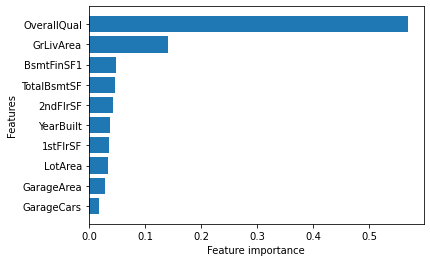

In [286]:
plot_features(X_train.columns, ideal_model.feature_importances_)